<a href="https://colab.research.google.com/github/Rohit-Roby/Project/blob/main/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install objaverse
!pip install trimesh
!pip install open3d
!pip install torchsummary

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gputil: filename=GPUtil-1.4.0-py3-none-any.whl size=7394 sha256=44be200a173d6b1fab7d3dfb42a3acb9b462b0978a8a841c25441311939874da
  Stored in directory: /root/.cache/pip/wheels/a9/8a/bd/81082387151853ab8b6b3ef33426e98f5cbfebc3c397a9d4d0
Successfully built gputil
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.9/693.9 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.7/399.7 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 96.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 84.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 84.0 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.6
    Unins

In [2]:
# Import libraries
import objaverse
import nltk
from nltk.corpus import stopwords  # for stop word removal
from nltk.stem import PorterStemmer  # for stemming (or use WordNetLemmatizer for lemmatization)
import string
import trimesh
import os
import shutil
import multiprocessing
nltk.download('stopwords')
import numpy as np
from matplotlib import pyplot as plt
import open3d as o3d
import torch
import torchsummary

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Loading the dataset files and dowloading 3d model**

In [3]:
#loading Uids
uids = objaverse.load_uids()
len(uids), type(uids)


(798759, list)

In [4]:

# lvis_annotations
lvis_annotations = objaverse.load_lvis_annotations()

# Sort the dictionary by value in descending order and select the top 20 items
items = dict(sorted(lvis_annotations.items(), key=lambda item: len(item[1]), reverse=True))
items.keys()

dict_keys(['chair', 'seashell', 'antenna', 'shield', 'snowman', 'chandelier', 'gravestone', 'cone', 'control', 'sword', 'armor', 'doughnut', 'banana', 'ring', 'fireplug', 'mushroom', 'fighter_jet', 'figurine', 'monitor_(computer_equipment) computer_monitor', 'mug', 'owl', 'shoe', 'helicopter', 'skateboard', 'soccer_ball', 'rifle', 'teddy_bear', 'bicycle', 'die', 'guitar', 'heart', 'race_car', 'lion', 'mask', 'gun', 'pumpkin', 'rabbit', 'sculpture', 'spectacles', 'apple', 'wedding_ring', 'telephone', 'elephant', 'police_cruiser', 'airplane', 'crab_(animal)', 'globe', 'lamppost', 'lampshade', 'windmill', 'toilet', 'trunk', 'pickup_truck', 'fan', 'mascot', 'shark', 'machine_gun', 'piano', 'pony', 'motor_vehicle', 'vase', 'sunglasses', 'wolf', 'frog', 'pottery', 'bookcase', 'penguin', 'spider', 'car_(automobile)', 'keg', 'table', 'television_set', 'wineglass', 'butterfly', 'crate', 'necklace', 'computer_keyboard', 'fire_extinguisher', 'manhole', 'armchair', 'coin', 'pizza', 'sportswear', '

In [5]:
len(items)

1156

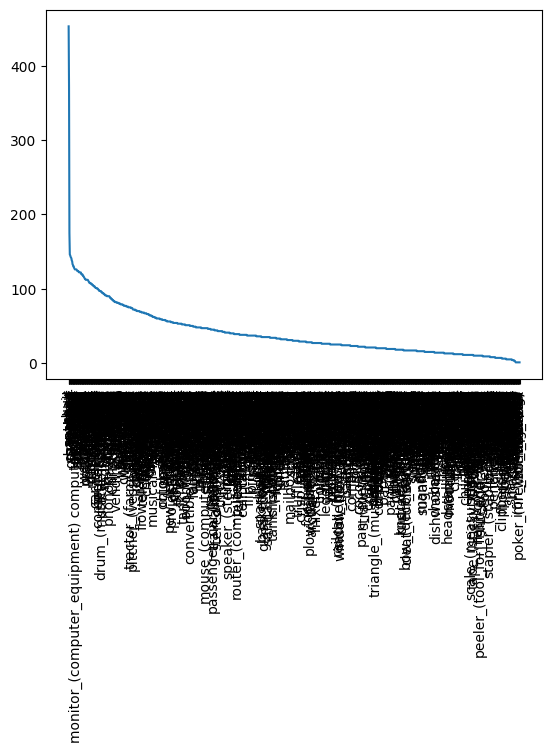

In [6]:

# Plot the keys against the lengths of the values
plt.xticks(rotation='vertical')
plt.plot(list(items.keys()), [len(value) for value in items.values()])
plt.show()


In [7]:
# # Load Objaverse annotations
# uids = []  # Initialize an empty list
# for uid_list in items.values():
#     uids.extend(uid_list)  # Add UIDs individually


In [8]:
len(uids)

798759

In [9]:
from google.colab import output
output.enable_custom_widget_manager()

Support for third party widgets will remain active for the duration of the session. To disable support:

In [10]:
annotations = objaverse.load_annotations(uids)

 99%|█████████▉| 159/160 [04:41<00:01,  1.77s/it]


In [11]:
# objaverse_description = []
for annotation in annotations.values():
    if isinstance(annotation, dict):
        tags = annotation.get("tags")  # No default value, get returns 'None' if key is missing
        if tags:  # Check if tags exists
            tag_descriptions = [tag['name'] for tag in tags]
            # ... (Rest of your code)
            description = " ".join(tag_descriptions)
             # Store tags and description with annotation
            annotation["description"] = description  # adding a description field
            # objaverse_description.append(description)

In [12]:
import pandas as pd
df = pd.DataFrame()
df['uids'] = uids



**Preprocessing of Text Description**

In [13]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
def clean_description(description):
    # Define stop words
    stop_words = set(stopwords.words("english"))


    # Remove punctuation
    text = description.translate(str.maketrans('', '', string.punctuation))

    # Remove stop words
    text = ' '.join([word for word in text.split() if word not in stop_words])

    # Lowercase conversion
    text = text.lower()

    # Stemming (or lemmatization)
    stemmer = PorterStemmer()  # You can replace this with WordNetLemmatizer for lemmatization
    text = ' '.join([stemmer.stem(word) for word in text.split()])

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

    return text


df['description'] = df['uids'].map(lambda uid: clean_description( annotations[uid]['description']))

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [14]:
import numpy as np
df['description'].replace('', np.nan, inplace=True)
df = df.dropna()

In [15]:
processes = multiprocessing.cpu_count()
processes
objects = objaverse.load_objects(
    uids = df['uids'].iloc[:2500],
    download_processes = processes
)

starting download of 2500 objects with 16 processes
Downloaded 1 / 2500 objects
Downloaded 2 / 2500 objects
Downloaded 3 / 2500 objects
Downloaded 4 / 2500 objects
Downloaded 5 / 2500 objects
Downloaded 6 / 2500 objects
Downloaded 7 / 2500 objects
Downloaded 8 / 2500 objects
Downloaded 9 / 2500 objects
Downloaded 10 / 2500 objects
Downloaded 11 / 2500 objects
Downloaded 12 / 2500 objects
Downloaded 13 / 2500 objects
Downloaded 14 / 2500 objects
Downloaded 15 / 2500 objects
Downloaded 16 / 2500 objects
Downloaded 17 / 2500 objects
Downloaded 18 / 2500 objects
Downloaded 19 / 2500 objects
Downloaded 20 / 2500 objects
Downloaded 21 / 2500 objects
Downloaded 22 / 2500 objects
Downloaded 23 / 2500 objects
Downloaded 24 / 2500 objects
Downloaded 25 / 2500 objects
Downloaded 26 / 2500 objects
Downloaded 27 / 2500 objects
Downloaded 28 Downloaded/  292500  /objects 2500
 objects
Downloaded 30 / 2500 objects
Downloaded 31 / 2500 objects
Downloaded 32 / 2500 objects
Downloaded 33 / 2500 objects


In [16]:
# Define the subfolder and parent folder paths
parent_dir = '/root/.objaverse/hf-objaverse-v1/glbs'

# Walk through the parent directory
for subdir, dirs, files in os.walk(parent_dir):
    for file in files:
        # Construct the file path
        file_path = os.path.join(subdir, file)
        # Construct the destination path
        dest_path = os.path.join(parent_dir, file)
        # Move the file to the parent directory
        shutil.move(file_path, dest_path)
    # If the current directory is not the parent directory, delete the subdirectory
    if subdir != parent_dir:
        os.rmdir(subdir)

df['glb_path'] = df['uids'].iloc[:2500].map(lambda x: objects[x])

In [17]:
df.head()

,uids,description,glb_path
0,8476c4170df24cf5bbe6967222d1a42d,stair staircas staircon,/root/.objaverse/hf-objaverse-v1/glbs/000-023/...
1,8ff7f1f2465347cd8b80c9b206c2781e,xyzschooldraftpunk3,/root/.objaverse/hf-objaverse-v1/glbs/000-023/...
2,c786b97d08b94d02a1fa3b87d2e86cf1,posi joist layout,/root/.objaverse/hf-objaverse-v1/glbs/000-023/...
3,139331da744542009f146018fd0e05f4,fridaynightfunkin whitti,/root/.objaverse/hf-objaverse-v1/glbs/000-023/...
5,efd35e7d21ac482688c294e3b6c9f74e,train crisi photogrammetrydron photogrammetri,/root/.objaverse/hf-objaverse-v1/glbs/000-023/...


In [18]:
# import re
# # Function to remove "/glbs"
# def remove_glbs(path):
#     return re.sub(r'\d{3}-\d{3}/', '', path)    # Replace '/glbs' with an empty string

# # Apply the function using map
# df['glb_path'] = df['glb_path'].map(remove_glbs)

In [19]:
import time

def verbose_time(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        print(f"{func.__name__} took {end_time - start_time:.2f} seconds to execute.")
        return result
    return wrapper

In [20]:
@verbose_time
def custom_function():
    # Your custom function code
    pass

# To use the verbose time decorator, just call your function:
custom_function()

custom_function took 0.00 seconds to execute.


In [21]:
@verbose_time
def custom_function():
    # Your custom function code
    pass

# To use the verbose time decorator, just call your function:
custom_function()

custom_function took 0.00 seconds to execute.


**Preprocessing of 3d model into point cloud**

In [22]:
import os
def get_model_paths(base_dir):
    model_paths = []
    for subdir, dirs, files in os.walk(base_dir):
        for file in files:
            if file.endswith(".glb"):
                file_path = os.path.join(subdir, file)
                model_paths.append(file_path)
    return model_paths
base_dir ='/root/.objaverse/hf-objaverse-v1/glbs'
model_paths = get_model_paths(base_dir)

In [23]:
df.head()

,uids,description,glb_path
0,8476c4170df24cf5bbe6967222d1a42d,stair staircas staircon,/root/.objaverse/hf-objaverse-v1/glbs/000-023/...
1,8ff7f1f2465347cd8b80c9b206c2781e,xyzschooldraftpunk3,/root/.objaverse/hf-objaverse-v1/glbs/000-023/...
2,c786b97d08b94d02a1fa3b87d2e86cf1,posi joist layout,/root/.objaverse/hf-objaverse-v1/glbs/000-023/...
3,139331da744542009f146018fd0e05f4,fridaynightfunkin whitti,/root/.objaverse/hf-objaverse-v1/glbs/000-023/...
5,efd35e7d21ac482688c294e3b6c9f74e,train crisi photogrammetrydron photogrammetri,/root/.objaverse/hf-objaverse-v1/glbs/000-023/...


In [24]:
df.to_csv('/root/.objaverse/Dataset')
import pandas as pd
df = pd.read_csv('/root/.objaverse/Dataset')

<ipython-input-24-ea1f21cd394f>:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/root/.objaverse/Dataset')


In [25]:
# from mpl_toolkits.mplot3d import Axes3D

# glbs = model_paths[0:5]
# # Create a figure and axes for the subplots
# fig, axs = plt.subplots(2, 3, figsize=(15, 10))
# # Loop through each subplot and display the mesh
# for i, ax in enumerate(axs.flat):
#     # Plot mesh in each subplot
#     for glb in glbs:
#       if glb:
#           mesh = o3d.io.read_triangle_mesh(glb)
#           ax = o3d.visualization.draw_plotly([mesh])
#       else:
#           # Hide empty subplots
#           ax.axis('off')
# plt.show()


**Voxelization using numpy**

In [26]:
import numpy as np
import os
from scipy.ndimage import zoom
from multiprocessing import Pool, cpu_count
# import pygltflib

**voxelization using open3d**

In [27]:
dir = '/root/.objaverse/hf-objaverse-v1/glbs'
num_processes = multiprocessing.cpu_count()  # Use the number of CPU cores


In [ ]:
df.head()

,Unnamed: 0,uids,description,glb_path
0,0,8476c4170df24cf5bbe6967222d1a42d,stair staircas staircon,/root/.objaverse/hf-objaverse-v1/glbs/000-023/...
1,1,8ff7f1f2465347cd8b80c9b206c2781e,xyzschooldraftpunk3,/root/.objaverse/hf-objaverse-v1/glbs/000-023/...
2,2,c786b97d08b94d02a1fa3b87d2e86cf1,posi joist layout,/root/.objaverse/hf-objaverse-v1/glbs/000-023/...
3,3,139331da744542009f146018fd0e05f4,fridaynightfunkin whitti,/root/.objaverse/hf-objaverse-v1/glbs/000-023/...
4,5,efd35e7d21ac482688c294e3b6c9f74e,train crisi photogrammetrydron photogrammetri,/root/.objaverse/hf-objaverse-v1/glbs/000-023/...


In [46]:
dataSet = {}

In [36]:
glb = model_paths[0]
file, _ = os.path.split(glb)[1].split('.glb')

In [37]:
file

'49a931a453484cdba1e4e9403b996b78'

In [48]:
@verbose_time
def o3d_voxelize(filepath):
    mesh = o3d.io.read_triangle_mesh(filepath)
    # os.path.split(filepath)[]
    print(mesh)
    id, _ = os.path.split(filepath)[1].split('.glb')
    # mesh.compute_vertex_normals()
    # fit to unit cube
    mesh.scale(1 / np.max(mesh.get_max_bound() - mesh.get_min_bound()),center=mesh.get_center())
    # o3d.visualization.draw([mesh])
    # print('voxelization')
    voxel_grid = o3d.geometry.VoxelGrid.create_from_triangle_mesh(mesh, voxel_size=0.05)
    # o3d.visualization.draw([voxel_grid])
    dataSet[id] = voxel_grid
    return voxel_grid

In [53]:
@verbose_time
#we convert to pytorch tensors to use later for training the GAN
def voxel_grid_to_tensor(voxel_grid, target_shape):

    voxels = np.asarray(voxel_grid.get_voxels())
    # if len(voxels) == 0:
    #       # Return an empty tensor if the voxel grid is empty
    #     return torch.zeros(target_shape, dtype=torch.float32)
    voxel_positions = np.array([voxel.grid_index for voxel in voxels])
    if voxel_positions.size == 0:
       return torch.zeros(target_shape, dtype=torch.float32)  # Return an empty tensor if no non-empty voxels


    max_coords = voxel_positions.max(axis=0)
    tensor_shape = tuple(max_coords + 1)
    voxel_tensor = torch.zeros(tensor_shape, dtype=torch.float32)
    voxel_tensor[tuple(voxel_positions.T)] = 1

    # Rescale tensor to target shape
    scaling_factors = [target_shape[i] / voxel_tensor.shape[i] for i in range(3)]
    voxel_tensor_rescaled = torch.tensor(zoom(voxel_tensor, scaling_factors, order=0))  # Use nearest neighbor scaling

    # Print the final shape of the tensor
    # print("Final tensor shape:", voxel_tensor_rescaled.shape)

    return voxel_tensor_rescaled



In [ ]:
df.head()

,Unnamed: 0,uids,description,glb_path
0,0,8476c4170df24cf5bbe6967222d1a42d,stair staircas staircon,/root/.objaverse/hf-objaverse-v1/glbs/000-023/...
1,1,8ff7f1f2465347cd8b80c9b206c2781e,xyzschooldraftpunk3,/root/.objaverse/hf-objaverse-v1/glbs/000-023/...
2,2,c786b97d08b94d02a1fa3b87d2e86cf1,posi joist layout,/root/.objaverse/hf-objaverse-v1/glbs/000-023/...
3,3,139331da744542009f146018fd0e05f4,fridaynightfunkin whitti,/root/.objaverse/hf-objaverse-v1/glbs/000-023/...
4,5,efd35e7d21ac482688c294e3b6c9f74e,train crisi photogrammetrydron photogrammetri,/root/.objaverse/hf-objaverse-v1/glbs/000-023/...


**Visualizing voxel grid**

In [40]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# def visualize_voxel_grid(voxel_grid):
#     fig = plt.figure()
#     ax = fig.add_subplot(111, projection='3d')

#     # Extract voxel grid dimensions
#     x_size, y_size, z_size = voxel_grid.shape

#     # Iterate over each voxel
#     for x in range(1):
#         for y in range(1):
#             for z in range(1):
#                 if voxel_grid[x, y, z] == 1:  # Filled voxel
#                     ax.scatter(x, y, z, color='b')

#     # Set labels and title
#     ax.set_xlabel('X')
#     ax.set_ylabel('Y')
#     ax.set_zlabel('Z')
#     ax.set_title('Voxel Grid Visualization')

#     plt.show()

# # Example usage
# # voxel_grid = np.random.randint(0, 2, size=(16, 16, 16))  # Random voxel grid for demonstration
# visualize_voxel_grid(voxel_grid)

NameError: name 'voxel_grid' is not defined

**PRETRAINED TEXT ENCODER USING T5**

In [41]:
import torch
import torch.nn as nn
import transformers
from transformers import T5ForConditionalGeneration, AutoTokenizer

In [42]:

class TextEncoder(nn.Module):
    def __init__(self, model_name="t5-large"):  # Choose a suitable T5 model size
        super().__init__()
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.transformer = T5ForConditionalGeneration.from_pretrained(model_name)

    def forward(self, text_input):
        input = self.tokenizer(text_input, return_tensors="pt")  # Tokenize input
        start_token_id = self.tokenizer.unk_token_id   # Or the correct start token for your model.
        decoder_input_ids = torch.tensor([[start_token_id]])
        input['decoder_input_ids'] = decoder_input_ids
        # print(input)
        outputs = self.transformer(**input)  # T5 model expects specific keyword arguments

        # Select appropriate representation
        # hidden_states = outputs.last_hidden_state  # Option 1: Last hidden state
        # Or potentially the encoder outputs if you need it for rephrasing later
        hidden_states = outputs.encoder_last_hidden_state

        # Simple mean pooling
        latent_representation = hidden_states.mean(dim=1)

        return latent_representation

In [43]:
sample_descriptions = ["A modern living room A minimalist bedroom A chair "]
text_encoder = TextEncoder()
for description in sample_descriptions:
    latent_representation = text_encoder(description)
    print(f"Description: {description}")
    print(f"Latent Representation: {latent_representation.shape}") # Check the shape
    print("--------------")

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.95G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

Description: A modern living room A minimalist bedroom A chair 
Latent Representation: torch.Size([1, 1024])
--------------


**GENERATOR AND DISCRIMINATOR MODELS**

In [ ]:
import torch.nn as nn

# Generator architecture
class Generator(nn.Module):
    def __init__(self, latent_dim):
        super(Generator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(latent_dim, 512 * 4 * 4 * 4),
            nn.ReLU(True)
        )
        self.deconv = nn.Sequential(
            nn.ConvTranspose3d(512, 256, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm3d(256),
            nn.ReLU(True),
            nn.ConvTranspose3d(256, 128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm3d(128),
            nn.ReLU(True),
            nn.ConvTranspose3d(128, 1, kernel_size=4, stride=2, padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.fc(x)
        x = x.view(-1, 512, 4, 4, 4)  # Reshape to 3D volume
        x = self.deconv(x)
        return x


In [ ]:

# Discriminator architecture
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv3d(1, 64, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm3d(64),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv3d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm3d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv3d(128, 256, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm3d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout3d(0.1)
        )
        self.fc = nn.Sequential(
            nn.Linear(256 * 4 * 4 *4 , 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.conv(x)
        x = x.view(-1, 256 * 4 * 4 *4 )  # Flatten
        x = self.fc(x)
        return x


**Model Training**

In [44]:

text_descriptions = df['description'].tolist()


In [54]:
# type(voxel_tensors)
from scipy.ndimage import zoom

voxel_grids = [o3d_voxelize(filepath) for filepath in model_paths[:100]]

target_shape = (32,32,32)
for id in dataSet.keys():
    dataSet[id] = voxel_grid_to_tensor(dataSet[id], target_shape)

# voxel_grids = [o3d_voxelize(filepath) for filepath in model_paths]
# voxel_tensors = [voxel_grid_to_tensor(voxel_grid, target_shape) for voxel_grid in voxel_grids]

TriangleMesh with 1008 points and 504 triangles.
o3d_voxelize took 0.01 seconds to execute.
TriangleMesh with 510823 points and 912612 triangles.
o3d_voxelize took 1.04 seconds to execute.
TriangleMesh with 186028 points and 271465 triangles.
o3d_voxelize took 0.38 seconds to execute.
TriangleMesh with 957868 points and 1163945 triangles.
o3d_voxelize took 1.38 seconds to execute.
TriangleMesh with 2390 points and 3384 triangles.
o3d_voxelize took 0.01 seconds to execute.
TriangleMesh with 88156 points and 136496 triangles.
o3d_voxelize took 0.19 seconds to execute.
TriangleMesh with 1420 points and 1530 triangles.
o3d_voxelize took 0.11 seconds to execute.
TriangleMesh with 2120 points and 4028 triangles.
o3d_voxelize took 0.03 seconds to execute.
TriangleMesh with 3353 points and 2352 triangles.
o3d_voxelize took 0.37 seconds to execute.
TriangleMesh with 54 points and 28 triangles.
o3d_voxelize took 0.00 seconds to execute.
TriangleMesh with 87165 points and 102274 triangles.
o3d_vo

<ipython-input-48-fd135771ddc8>:9: RuntimeWarning: divide by zero encountered in scalar divide
  mesh.scale(1 / np.max(mesh.get_max_bound() - mesh.get_min_bound()),center=mesh.get_center())


TriangleMesh with 193026 points and 65040 triangles.
o3d_voxelize took 0.34 seconds to execute.
TriangleMesh with 1410903 points and 2099999 triangles.
o3d_voxelize took 2.11 seconds to execute.
TriangleMesh with 67844 points and 88312 triangles.
o3d_voxelize took 0.14 seconds to execute.
TriangleMesh with 34153 points and 37824 triangles.
o3d_voxelize took 0.18 seconds to execute.
TriangleMesh with 804 points and 1372 triangles.
o3d_voxelize took 0.00 seconds to execute.
TriangleMesh with 307912 points and 499922 triangles.
o3d_voxelize took 0.60 seconds to execute.
TriangleMesh with 77947 points and 29866 triangles.
o3d_voxelize took 0.13 seconds to execute.
TriangleMesh with 1816386 points and 1894890 triangles.
o3d_voxelize took 2.44 seconds to execute.
TriangleMesh with 10214 points and 12056 triangles.
o3d_voxelize took 0.03 seconds to execute.
TriangleMesh with 120886 points and 179680 triangles.
o3d_voxelize took 0.49 seconds to execute.
TriangleMesh with 3657 points and 2313 t

In [55]:
# text_encoder = TextEncoder()

# voxel_tensors_sqe = [tensor.unsqueeze(0) for tensor in voxel_tensors]
for id, tensor in dataSet.items():
    dataSet[id] = tensor.unsqueeze(0)

In [ ]:
voxel_tensors_sqe[19].shape

torch.Size([1, 32, 32, 32])

In [56]:
tensor_shapes = []
# for tensor in voxel_tensors_sqe:  # Replace 'my_tensor_list' with your actual storage
#     tensor_shapes.append(tensor.shape)
for tensor in dataSet.values():
    tensor_shapes.append(tensor.shape)

In [57]:
all_same_size = True  # Initial assumption
reference_shape = tensor_shapes[0]  # Take the first shape as a reference
count =0
# voxel_tensors_sq = []
# for tensor in voxel_tensors_sqe:  # Iterate from the second shape onwards
#     if tensor.shape != reference_shape:
#         all_same_size = False
#         count = count +1
#         # break  # Exit the loop as soon as you find a mismatch
#     else :
#         voxel_tensors_sq.append(tensor)
# if all_same_size:
#     print("All tensors have the same size")
# else:
#     print("Tensors have different sizes")
#     print(count)

updated_dataSet = {}

for key, tensor in dataSet.items():
    if tensor.numel() > 0:  # Check if tensor has values
        updated_dataSet[key] = tensor
    elif tensor.shape != torch.Size([]):  # Check if tensor has a non-empty shape
        updated_dataSet[key] = tensor

dataSet = updated_dataSet

In [58]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

Using device: cuda


In [59]:
# voxel_tensors_sq = [tensor.to(device) for tensor in voxel_tensors_sq]
for id, tensor in dataSet.items():
    dataSet[id] = tensor.to(device)

In [61]:
import numpy as np
np.save('dataSet.npy',dataSet)

In [ ]:
voxel_data = [vox.cpu().numpy() for vox in voxel_tensors_sq]

In [ ]:
# gen_path = 'generator.pth'
# dis_path = 'discriminator.pth'

In [ ]:
dataSet

In [ ]:
# generator.load_state_dict(torch.load(gen_path))
# discriminator.load_state_dict(torch.load(dis_path))

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

batch_size = 128  # Define your batch size
num_epochs = 100  # Define the number of epochs
learning_rate = 0.0002  # Define the learning rate
train_loader = torch.utils.data.DataLoader(
    voxel_tensors_sq, batch_size=batch_size, shuffle=True
)
latent_dim = 1024
# latent_dim = latent_dim.astype(torch.float32)
#define generator and discriminator networks
generator = Generator(latent_dim)
discriminator = Discriminator()
generator = generator.to(device)
discriminator = discriminator.to(device)

def weights_init(m):
    if isinstance(m, nn.Conv3d) or isinstance(m, nn.ConvTranspose3d):
        nn.init.kaiming_normal_(m.weight.data, nonlinearity='relu')
    elif isinstance(m, nn.Linear):
        nn.init.kaiming_normal_(m.weight.data)

discriminator_losses =[]
generator_losses =[]
# Apply the initialization to the networks
generator.apply(weights_init)
discriminator.apply(weights_init)

# Assuming you have defined your loss function and optimizers
criterion = nn.BCELoss().to(device)
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=learning_rate, betas=(0.5, 0.999))
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=learning_rate, betas=(0.5, 0.999))


def train_gen(train_loader):
    for  n, voxelgrid_tensor in enumerate(train_loader):
            # Data for training the discriminator

            voxelgrid_tensor.to(device)
            curr_batch_size = voxelgrid_tensor.size(0)  # Get the current batch size
            # print(curr_batch_size)
            # current_batch_size = voxelgrid_tensor.size(0)
            real_labels = torch.ones((curr_batch_size, 1)).to(device)
            fake_labels = torch.zeros(curr_batch_size, 1).to(device)

            latent_space_samples = torch.randn((curr_batch_size, latent_dim)).to(device)

            latent_space_samples = latent_space_samples.to(device)
            generated_samples = generator(latent_space_samples)

            # Training the discriminator
            discriminator.zero_grad()
            output_discriminator_real = discriminator(voxelgrid_tensor)
            output_discriminator_fake = discriminator(generated_samples.detach())  # Detach to avoid backpropagation through generator

            # print('output_discriminator_fake.shape',output_discriminator_fake.shape,'real_labels.shape',real_labels.shape)
            # print('output_discriminator_real.shape', type(output_discriminator_real),'torch.zeros_like(real_labels).shape',torch.zeros_like(real_labels).shape )

            # Compute discriminator loss
            loss_discriminator_real = criterion(output_discriminator_real, real_labels)
            loss_discriminator_fake = criterion(output_discriminator_fake,fake_labels)
            discriminator_loss = (loss_discriminator_real + loss_discriminator_fake) / 2
            # print('loss_discriminator_real :',loss_discriminator_real,'loss_discriminator_fake :',loss_discriminator_fake,'discriminator_loss :',discriminator_loss)

            discriminator_loss.backward()
            optimizer_discriminator.step()

            # Training the generator
            generator.zero_grad()
            generated_samples = generator(latent_space_samples).to(device)
            output_discriminator_generated = discriminator(generated_samples)

            # Calculate the generator loss
            loss_generator = criterion(output_discriminator_generated, real_labels)
            loss_generator.backward()
            optimizer_generator.step()
            print('loss_generator :',loss_generator)
            print('loss_discriminator :',discriminator_loss)
            discriminator_losses.append(discriminator_loss)
            generator_losses.append(loss_generator)
            # Show loss
            if (epoch % 10 == 0) and (n == len(train_loader) - 1):
                print(f"Epoch: {epoch} Loss D.: {discriminator_loss.item()}")
                print(f"Epoch: {epoch} Loss G.: {loss_generator.item()}")

for epoch in range(num_epochs):
    # for name, param in discriminator.named_parameters():
        # if param.requires_grad:
            # print(name, param.grad)

    train_gen(train_loader)

loss_generator : tensor(5.1255, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
loss_discriminator : tensor(0.7880, device='cuda:0', grad_fn=<DivBackward0>)
loss_generator : tensor(3.6110, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
loss_discriminator : tensor(2.6676, device='cuda:0', grad_fn=<DivBackward0>)
loss_generator : tensor(6.0103, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
loss_discriminator : tensor(2.3122, device='cuda:0', grad_fn=<DivBackward0>)
loss_generator : tensor(7.5086, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
loss_discriminator : tensor(1.5837, device='cuda:0', grad_fn=<DivBackward0>)
loss_generator : tensor(6.8647, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
loss_discriminator : tensor(1.1844, device='cuda:0', grad_fn=<DivBackward0>)
loss_generator : tensor(8.8847, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
loss_discriminator : tensor(1.1915, device='cuda:0', grad_fn=<DivBackward0>)
loss_gener

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

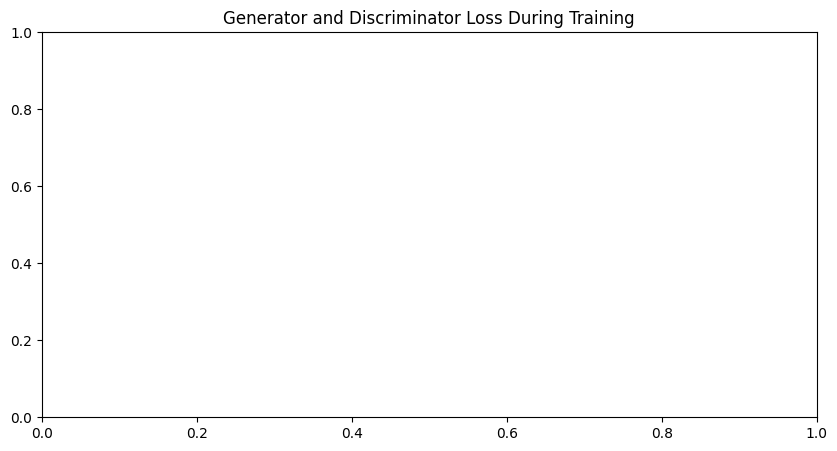

In [ ]:
# Plot the loss values
plt.figure(figsize=(10, 5))
plt.title("Generator and Discriminator Loss During Training")
# generator_losses
generator_losses = [generator_loss.to('cpu') for generator_loss in generator_losses]
plt.plot(generator_losses, label="G")
plt.plot(discriminator_losses.cpu().numpy(), label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [ ]:

# After training, you can save your models if needed
torch.save(generator.state_dict(), 'generator.pth')
torch.save(discriminator.state_dict(), 'discriminator.pth')


In [ ]:
res = generator(torch.randn(latent_dim).to(device))

In [ ]:
res.shape

torch.Size([1, 1, 32, 32, 32])

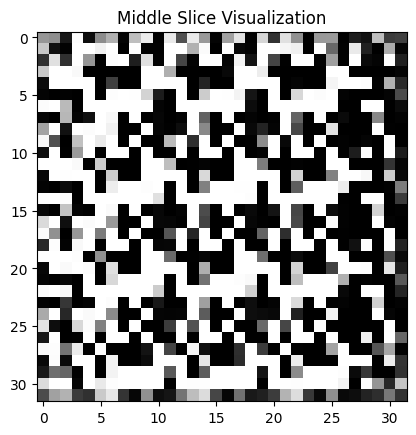

In [ ]:
# Select a slice to visualize, for example, the middle slice along the first dimension
out = res.cpu()
slice_2d = out[0, 0, 16, :, :].detach().numpy()

# Plot the slice
plt.imshow(slice_2d, cmap='gray')
plt.title('Middle Slice Visualization')
plt.show()

In [ ]:
out = out.squeeze().detach().numpy()

In [ ]:
out.shape

(32, 32, 32)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
voxel_grid_tensor = res.cpu().detach().squeeze()

In [ ]:
pip install "git+https://github.com/facebookresearch/pytorch3d.git@stable"

  Cloning https://github.com/facebookresearch/pytorch3d.git (to revision stable) to /tmp/pip-req-build-ip7dg4qb
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/pytorch3d.git /tmp/pip-req-build-ip7dg4qb
  Running command git checkout -q f34104cf6ebefacd7b7e07955ee7aaa823e616ac
  Resolved https://github.com/facebookresearch/pytorch3d.git to commit f34104cf6ebefacd7b7e07955ee7aaa823e616ac
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pytorch3d: filename=pytorch3d-0.7.6-cp310-cp310-linux_x86_64.whl size=56542864 sha256=783f5d36db3f28b97ef82847f2345be441f303b29946c1abc9c894cbbf69209b
  Stored in directory: /tmp/pip-ephem-wheel-cache-z2ucwkna/wheels/39/5f/20/2d3b6f3a35a60bdc0ba3c19da94340db9596637

In [ ]:
import torch.nn as nn

# Generator architecture
class Generator(nn.Module):
    def __init__(self, latent_dim):
        super(Generator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(latent_dim, 512 * 4 * 4 * 4),
            nn.ReLU(True)
        )
        self.deconv = nn.Sequential(
            nn.ConvTranspose3d(512, 256, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm3d(256),
            nn.ReLU(True),
            nn.ConvTranspose3d(256, 128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm3d(128),
            nn.ReLU(True),
            nn.ConvTranspose3d(128, 1, kernel_size=4, stride=2, padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.fc(x)
        x = x.view(-1, 512, 4, 4, 4)  # Reshape to 3D volume
        x = self.deconv(x)
        return x


In [145]:
# Generator architecture
class ConditionalGenerator(nn.Module):
    def __init__(self, latent_dim, noise_dim):
        super(ConditionalGenerator, self).__init__()
        self.fc = nn.Sequential(
          nn.Linear((latent_dim + noise_dim), 512 * 4 * 4 * 4),
          nn.ReLU(True)
        )
        self.deconv = nn.Sequential(
            nn.ConvTranspose3d(512, 256, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm3d(256),
            nn.ReLU(True),
            nn.ConvTranspose3d(256, 128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm3d(128),
            nn.ReLU(True),
            nn.ConvTranspose3d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm3d(64),
            nn.ReLU(True),
            nn.ConvTranspose3d(64, 1, kernel_size=4, stride=2, padding=1),
            nn.Sigmoid()  # or nn.Tanh(), depending on your data normalization
        )


    def forward(self, latent_description, noise):
        latent_description = latent_description.unsqueeze(2).unsqueeze(3).unsqueeze(4)  # Add singleton dimensions
        noise = noise.unsqueeze(-1).unsqueeze(-1).unsqueeze(-1)  # Add singleton dimensions
        noise = noise.repeat(1, 1, 4, 4, 4)  # Repeat noise to match the voxel tensor dimensions
        x = torch.cat((latent_description, noise), dim=1)  # Concatenate latent description and noise
        print(x.shape)
        x = self.fc(x)
        x = x.view(-1, 512, 4, 4, 4)  # Reshape to start the 3D volume
        print(x.shape)
        x = self.deconv(x)
        return x



In [66]:
from torchsummary import summary

In [69]:
# latent_dim = 512
# noise_dim = 512
# generator = ConditionalGenerator(latent_dim, noise_dim).to(device)
# latent_description_size = (1,latent_dim)
# noise_size = (1,noise_dim)
# Create dummy input tensors with the specified sizes
dummy_input = torch.randn(*latent_description_size).to(device)
noise_tensor = torch.randn(*noise_size).to(device)

# # Call summary with the correct input size
# # Note: The input size should match the expected input of the generator's forward method
# summary(generator, input_size=[latent_description_size, noise_size])

TypeError: empty(): argument 'size' failed to unpack the object at pos 2 with error "type must be tuple of ints,but got tuple"

In [144]:
class ConditionalDiscriminator(nn.Module):
    def __init__(self, latent_dim):
        super(ConditionalDiscriminator, self).__init__()
        # Define the architecture for processing the voxel tensor
        self.conv = nn.Sequential(
            nn.Conv3d(1, 64, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv3d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm3d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv3d(128, 256, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm3d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout3d(0.4)
        )
        # Define the architecture for processing the latent description
        self.fc_latent = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.LeakyReLU(0.2, inplace=True)
        )
        # Combine the outputs from the voxel tensor and latent description
        self.fc_combined = nn.Sequential(
            nn.Linear(256 * 4 * 4 * 4 + 256, 1),
            nn.Sigmoid()
        )

    def forward(self, voxel_tensor, latent_description):
        voxel_features = self.conv(voxel_tensor)
        voxel_features = voxel_features.view(-1, 256 * 4 * 4 * 4)  # Flatten the voxel features
        print(voxel_features.shape)
        latent_features = self.fc_latent(latent_description)  # Process the latent description
        latent_features = latent_features.view(-1,256)
        latent_features = latent_features.repeat(32,1,1,1,1)
        print(latent_features.shape)
        combined_features = torch.cat((voxel_features, latent_features), 1)  # Concatenate the features
        validity = self.fc_combined(combined_features)  # Determine validity (real or fake)
        return validity


RuntimeError: mat1 and mat2 shapes cannot be multiplied (2048x1 and 2048x2048)

In [71]:
# discriminator = ConditionalDiscriminator()
# summary(discriminator,(1,32,32,32) ,(1,1024))

TypeError: ConditionalDiscriminator.__init__() missing 1 required positional argument: 'latent_dim'

In [73]:
import torch
from torch.utils.data import Dataset, DataLoader

In [74]:
class CustomDataset(Dataset):
    def __init__(self, dataSet):
        self.dataSet = dataSet
        self.ids = list(dataSet.keys())

    def __len__(self):
        return len(self.ids)

    def __getitem__(self, idx):
        id = self.ids[idx]
        voxel_tensor = self.dataSet[id]
        return voxel_tensor, id

In [146]:
import torch
import torch.nn as nn
import torch.optim as optim

text_encoder = TextEncoder()
batch_size = 32  # Define your batch size
num_epochs = 10  # Define the number of epochs
learning_rate = 0.0002  # Define the learning rate
custom_dataset = CustomDataset(dataSet)
train_loader = torch.utils.data.DataLoader(
     custom_dataset, batch_size=batch_size, shuffle=True
)
latent_dim = noise_dim = 1024
# latent_dim = latent_dim.astype(torch.float32)
#define generator and discriminator networks
generator = ConditionalGenerator(latent_dim, noise_dim).to(device)
discriminator = ConditionalDiscriminator(latent_dim)
generator = generator.to(device)
discriminator = discriminator.to(device)

def weights_init(m):
    if isinstance(m, nn.Conv3d) or isinstance(m, nn.ConvTranspose3d):
        nn.init.kaiming_normal_(m.weight.data, nonlinearity='relu')
    elif isinstance(m, nn.Linear):
        nn.init.kaiming_normal_(m.weight.data)

discriminator_losses =[]
generator_losses =[]
# Apply the initialization to the networks
generator.apply(weights_init)
discriminator.apply(weights_init)

# Assuming you have defined your loss function and optimizers
criterion = nn.BCELoss().to(device)
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=learning_rate, betas=(0.5, 0.999))
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=learning_rate, betas=(0.5, 0.999))



In [147]:
discriminator_losses_epoch = []
generator_losses_epoch = []
def train_gen(train_loader):
    for n, (voxelgrid_tensor, id) in enumerate(train_loader):
        latent_representation =[]
        prompts = []
        for i in id:
            prompts.append(annotations[i]['description'])

        voxel_grid_tensor = voxelgrid_tensor.to(device)
        curr_batch_size = voxel_grid_tensor.size(0)

        real_labels = torch.ones((curr_batch_size, 1)).to(device)
        fake_labels = torch.zeros(curr_batch_size, 1).to(device)

        latent_space_samples = torch.randn((curr_batch_size, latent_dim)).to(device)
        noise = torch.randn((curr_batch_size, noise_dim)).to(device)
        for text in prompts:
          latent_representation.append(text_encoder(text))
        # Obtain latent descriptions from text encoder
        # latent_descriptions = text_encoder(prompts)  # Adjust according to your text encoder
        # Assuming generator is your generator network and z is your noise vector
        generated_samples = generator(latent_space_samples, noise)

        # Training the discriminator
        optimizer_discriminator.zero_grad()

        for latent_description in latent_representation:
            # Ensure voxel_features is 5D
            # if len(voxel_grid_tensor.shape) < 5:
            #     voxel_grid_tensor = voxel_grid_tensor.unsqueeze(-1).unsqueeze(-1).unsqueeze(-1)
            output_discriminator_real = discriminator(voxel_grid_tensor.detach(), latent_description.to(device)).to(device)
            output_discriminator_fake = discriminator(generated_samples.detach(), latent_description.to(device)).to(device)

            loss_discriminator_real = criterion(output_discriminator_real, real_labels)
            loss_discriminator_fake = criterion(output_discriminator_fake, fake_labels)
            discriminator_loss = (loss_discriminator_real + loss_discriminator_fake) / 2

            discriminator_loss.backward()

        discriminator_loss.backward()
        optimizer_discriminator.step()

        # Training the generator
        optimizer_generator.zero_grad()
        generated_samples = generator(latent_space_samples, noise).to(device)
        output_discriminator_generated = discriminator(generated_samples, latent_descriptions)

        loss_generator = criterion(output_discriminator_generated, real_labels)
        loss_generator.backward()
        optimizer_generator.step()

        discriminator_losses.append(discriminator_loss)
        generator_losses.append(loss_generator)

        if (epoch % 10 == 0) and (n == len(train_loader) - 1):
            print(f"Epoch: {epoch} Loss D.: {discriminator_loss.item()}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator.item()}")

for epoch in range(num_epochs):
    # for name, param in discriminator.named_parameters():
        # if param.requires_grad:
            # print(name, param.grad)

    train_gen(train_loader)

RuntimeError: Sizes of tensors must match except in dimension 1. Expected size 1 but got size 4 for tensor number 1 in the list.